# Big Data and Data Analytics - Lab Project 
This lab project covers the material from Lectures 1-5. Please make yourself familiar with the lecture content before proceeding. We will be using the [**CSM**](https://archive.ics.uci.edu/ml/datasets/CSM+%28Conventional+and+Social+Media+Movies%29+Dataset+2014+and+2015) movie dataset courtesy of Mehreen Ahmed on the UCI Machine Learning Repository.

**<u>How to complete</u>**:
- For each exercise, read the objective and hint, and then fill the cells. These will usually be code cells requiring you to write Python code. If we ask you to explain something in plaintext, these may also be Markdown cells.
- Allowed libraries are imported below. No additional libraries may be used for this lab project.
- **Run all cells before submitting. You will only get marks for code that has been run, and has not produced any errors.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import MultiComparison

If there are any errors during the import above, you may need to install the required libraries/packages libraries (e.g. "pip install ...").

## Exercise 1: Dataset Import, Exploration and Preparation 

### Exercise 1.1 
- Load the dataset `moviedata.csv` into a pandas `DataFrame` named `df_movie`.
- Exclude all rows with missing data from `df_movie`.
- `print` the number of rows before and after removing observations with missing data in a single gramatically coherent sentence.

Hint: Look at the functions [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [`pd.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) and [`pd.DataFrame.any`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html).

In [2]:
df_movie = pd.read_csv("moviedata(3).csv", na_values=['?','NA',''])


print("The number of rows before removing observations with missing data :", len(df_movie.index)) 
      
df_movie = df_movie.dropna(axis=0)      
      
print("and after removing observations :", len(df_movie.index))


The number of rows before removing observations with missing data : 231
and after removing observations : 187


### Exercise 1.2 
- Create a new column `profit` in `df_movie` by subtracting the variables `gross` and `budget`.
- Create a new categorical column `sequelcat` in `df_movie` which takes the value `sequel` if the movie is a sequel, and `original` otherwise. 
- Find the five most profitable `original` movies and `print` their `movie` title and `profit` to the console (sorted as highest profit first).
- Find the five least profitable `sequel` movies and `print` these `movie` title and `profit` to the console (sorted as lowest profit first).

Hint: Look at [`pd.DataFrame.sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html), [`pd.DataFrame.astype`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html), [`pd.Series.cat.rename_categories`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.rename_categories.html) and the pandas slicing and subsetting notation.

In [3]:
#Create a new column profit in df_movie by subtracting the variables gross and budget.
df_movie['profit'] = np.subtract(df_movie['gross'], df_movie['budget']) 

#Create a new categorical column sequelcat in df_movie which takes the value sequel if the movie is a sequel, and original otherwise.
df_movie['sequelcat'] = df_movie["dummy_sequel"] 
df_movie.replace({"sequelcat": {0:"original", 1:"sequel"}},inplace=True)

profitsorted = df_movie.sort_values(by="profit", ascending=False)
print("The 5 most profitable movies:", 
      profitsorted[['movie','profit']][0:5])

profitsorted2 = df_movie.sort_values(by="profit")
print("The 5 least profitable profitable movies: ", 
      profitsorted2[['movie','profit']][0:5])

The 5 most profitable movies:                                      movie       profit
163                         Jurassic World  493000000.0
10                         American Sniper  291200000.0
167                                Minions  251000000.0
127  The Hunger Games: Mockingjay - Part 1  212000000.0
164                Avengers: Age of Ultron  208000000.0
The 5 least profitable profitable movies:                   movie       profit
190  Jupiter Ascending -128600000.0
179       Tomorrowland  -96800000.0
36    Edge of Tomorrow  -78000000.0
99         Seventh Son  -77800000.0
149      Transcendence  -77000000.0


## Exercise 2: Visualisation 

### Exercise 2.1 
Create a violin plot with an overlayed boxplot based on `df_movie` that shows the `profit` on the y-Axis separately for `original` movies and `sequel` movies. Color the violin plot blue for `original`s and orange for `sequel`s. Use an appropriate title and axis labels. 

Hint: Look at [`plt.violinplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) and [`plt.boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

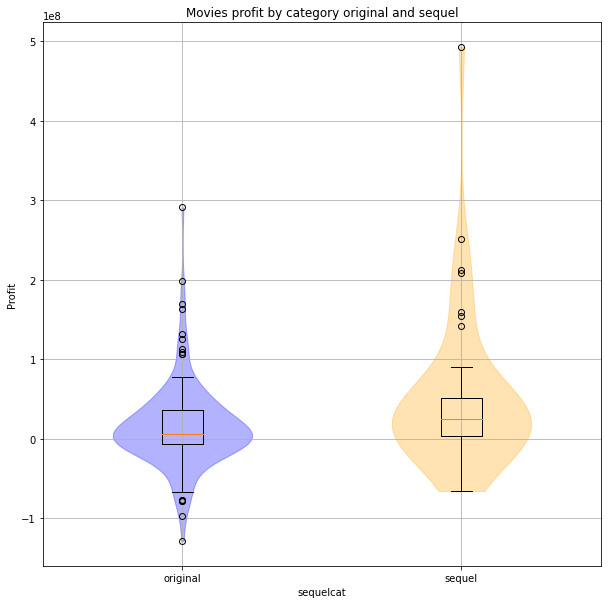

In [158]:
plotlabels = ['original','sequel']
plotdata = [df_movie[df_movie['sequelcat']==label]['profit'] for label in plotlabels]
colors = ['blue', 'orange']
plt.figure(figsize=(10, 10))
vparts = plt.violinplot(plotdata, showextrema=False) # Violin plot incl. density estimation
for patch, color in zip(vparts['bodies'], colors):
    patch.set_color(color) # Set color for violin plot
plt.boxplot(plotdata, widths=0.15, zorder=3, labels=plotlabels) # Overlay box plot
plt.xlabel('sequelcat') # Set x label
plt.ylabel('Profit') # Set y label
plt.title('Movies profit by category original and sequel') 
plt.grid(zorder=0) # Add grid
plt.show()

### Exercise 2.2 
- Create a new column `likes_winsor` in `df_movie` with a 5% winsorised version of the column `likes`. To make sure the winsorising worked, compare the minimum and maximum values of the two columns.
- Create a new column `ratingscat` based on `ratings` in `df_movie`, which describes the ratings category of a movie. Distinguish between the following categories:
    - `negative`: $0 <= ratings < 6$
    - `neutral`: $6 <= ratings < 6.8$
    - `positive`: $6.8 <= ratings <= 10$

Hint: For winsorising, you may use either the custom defined function from Lecture 3, or [`scipy.stats.mstats.winsorize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html). Also look at [`np.ndarray.min`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html), [`np.ndarray.max`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html), and [`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

In [4]:
def winsorize(x, limit): 
    y = np.array(x, copy=True)
    b_low = np.sort(x)[int(limit*len(x))]
    b_high = np.sort(x)[int((1-limit)*len(x))-1]
    y[x < b_low] = b_low
    y[x > b_high] = b_high
    return y
# Create a new column likes_winsor in df_movie with a 5% winsorised version of the column likes
df_movie['likes_winsor'] = np.array(df_movie["likes"])

stats.mstats.winsorize(df_movie['likes_winsor'], limits=[0.05,0.05], inplace=True)

print("The min value of likes:", min(df_movie["likes"]))
print("The min value of likes_winsor:", min(df_movie["likes_winsor"]))
print("The max value of likes:", max(df_movie["likes"]))
print("The max value of likes_winsor:", max(df_movie["likes_winsor"]))

df_movie['ratingscat'] = pd.cut(df_movie['ratings'], bins=[0,6,6.8,10], labels=['negative','neutral','positive'], right=False)
df_movie.head(5)# used to check the new variable results

The min value of likes: 1
The min value of likes_winsor: 85
The max value of likes: 370552
The max value of likes_winsor: 38810


,movie,year,ratings,genre,gross,budget,screens,sequel,dummy_sequel,sentiment,views,likes,dislikes,comments,aggregate_followers,profit,sequelcat,likes_winsor,ratingscat
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,0,3280543,4632,425,636,1120000.0,-3990870.0,original,4632,neutral
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,1,2,583289,3465,61,186,12350000.0,142000000.0,sequel,3465,positive
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,0,304861,328,34,47,483000.0,2700000.0,original,328,neutral
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,1,0,452917,2429,132,590,568000.0,-4000000.0,sequel,2429,neutral
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,1,0,3145573,12163,610,1082,1923800.0,13800000.0,sequel,12163,negative


### Exercise 2.3 
Create a scatter plot for `gross` over `likes_winsor` in `df_movie`. This means that `likes_winsor` should occupy the x-Axis, and `gross` the y-Axis. Indicate the
different `ratingscat` categories by colouring movies with `negative` ratings in *Red*, `neutral` ratings in *Blue*, and `positive` ratings in *Green*. Please use an appropriate title and axis labels, as well as a legend.

Hint: Look at [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

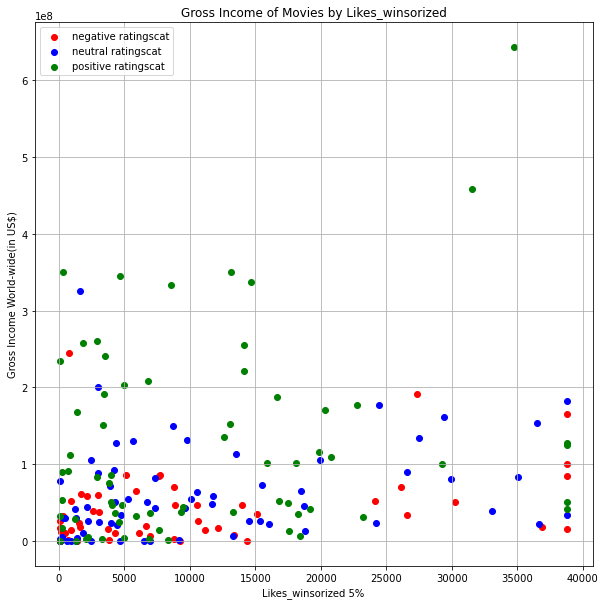

In [6]:
plotlabels = np.sort(df_movie['ratingscat'].unique())
plotdata = [df_movie[df_movie['ratingscat']==label][['gross','likes_winsor']] for label in plotlabels]
colors = ["red", "blue", "green"] #  colors 
plt.figure(figsize=(10, 10)) # Specify figure size
for i, data in enumerate(plotdata):
    plt.scatter(data['likes_winsor'],data['gross'],color=colors[i],label="{} ratingscat".format(plotlabels[i]))
plt.xlabel('Likes_winsorized 5%') # label for the x axis
plt.ylabel('Gross Income World-wide(in US$)') # label for the y axis
plt.title('Gross Income of Movies by Likes_winsorized') #  title
plt.legend() # Add legend
plt.grid(zorder=5) 
plt.show()

## Exercise 3: Hypothesis testing

### Exercise 3.1 
- Create a new dataframe `df_movie_stats` which groups `df_movie` by `ratingscat` and `sequelcat` to describe each group by the number of observations and the means and standard deviations of `profit`, `gross`, and `budget`. `df_movie_stats` will hence contain six rows (3 possible values for `ratingscat` * 2 possible values for `sequelcat`) and have the columns `N`, `profit_mean`, `profit_std`, `gross_mean`, `gross_std`, `budget_mean`, and `budget_std`.
- `print` `df_movie_stats` to the console.

Hint: Look up [`pd.DataFrame.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [`pd.DataFrame.agg`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html).

In [8]:

df_movie_stats = df_movie[['ratingscat','sequelcat','profit','gross','budget']].groupby(['ratingscat','sequelcat']).agg(
    N=pd.NamedAgg(column='profit', aggfunc='count'),
    profit_mean=pd.NamedAgg(column='profit', aggfunc='mean'),
    profit_std=pd.NamedAgg(column='profit', aggfunc='std'),
    gross_mean=pd.NamedAgg(column='gross', aggfunc='mean'),
    gross_std=pd.NamedAgg(column='gross', aggfunc='std'),
    budget_mean=pd.NamedAgg(column='budget', aggfunc='mean'),
    budget_std=pd.NamedAgg(column='budget', aggfunc='std'))
 
print(df_movie_stats)

                       N   profit_mean    profit_std    gross_mean  \
ratingscat sequelcat                                                 
negative   original   41 -2.729568e+05  4.690779e+07  3.906034e+07   
           sequel     10  2.200300e+07  1.946555e+07  6.025300e+07   
neutral    original   50  8.570419e+06  4.052342e+07  4.618107e+07   
           sequel     18  3.473889e+07  7.219638e+07  9.811667e+07   
positive   original   54  3.355594e+07  6.182850e+07  8.350780e+07   
           sequel     14  9.831429e+07  1.409554e+08  2.665286e+08   

                         gross_std   budget_mean    budget_std  
ratingscat sequelcat                                            
negative   original   4.202196e+07  3.933329e+07  4.281692e+07  
           sequel     7.107304e+07  3.825000e+07  6.236508e+07  
neutral    original   5.094023e+07  3.761066e+07  4.191073e+07  
           sequel     7.248261e+07  6.337778e+07  3.438850e+07  
positive   original   8.892528e+07  4.995185e+07 

### Exercise 3.2 
- Based on `df_movie`, use a Bartlett’s test to test for variance homogeneity in the column `profit` across the three different ratings categories (column: `ratingscat`). `print` the resulting test statistic and p-value to the console.
- In your own words, explain what the null hypothesis is, and then interpret the results of the test.

Hint: Look at [`scipy.stats.bartlett`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html).

In [10]:
stat, p = stats.bartlett(df_movie[df_movie['ratingscat']=='negative']['profit'], df_movie[df_movie['ratingscat']=='neutral']['profit'], df_movie[df_movie['ratingscat']=='positive']['profit'])
print("test statistic chi_sq = {:.4f}; p-value = {:.4e}".format(stat, p))

test statistic chi_sq = 32.2842; p-value = 9.7628e-08


The test null hypothesis is an assumption that the variances are equal for all subsamples, in other words the movie profit variance is homogeneous across the three movie ratings categories. In this case the small p-value = 9.7628e-08 rejects the null hyppothesis and indicates the variance is not homogeneous.

### Exercise 3.3 
- Again based on `df_movie`, use a one‐way Analysis of Variance (ANOVA) to test whether there is a difference in mean `profit` across the three different ratings categories (column: `ratingscat`). `print` the resulting test statistic and p-value to the console.
- In your own words, explain what the null hypothesis is, and then interpret the results of the test.

Hint: Look at [`scipy.stats.f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

In [163]:
stat, p = stats.f_oneway(df_movie[df_movie['ratingscat']=='negative']['profit'], df_movie[df_movie['ratingscat']=='neutral']['profit'], df_movie[df_movie['ratingscat']=='positive']['profit'])
print("test statistic F = {:.4f}; p-value = {:.4e}".format(stat, p))

test statistic F = 7.3630; p-value = 8.3911e-04


The null hypothesis assumes the mean profit across the three ratings categories are equaly the same. In this case, there is a significant relationship between the movies profit and rating categories( F = 7.3630; p-value<0.001).

### Exercise 3.4 
Continue working on the differences in mean `profit` between the `ratingscat` categories in `df_movie`.
- Conduct a PostHoc analysis with Tukey HSD to determine which pairs of categories (if any) have significantly different means from each other. `print` the results to the console.
- In your own words, interpret the results of the test.

Hint: Look at [`statsmodels.stats.multicomp.MultiComparison`](https://www.statsmodels.org/dev/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html). `MultiComparison` has been imported above.

In [164]:
comp = MultiComparison(df_movie['profit'], df_movie['ratingscat']).tukeyhsd().summary()
print(comp)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
 group1   group2     meandiff   p-adj      lower          upper     reject
--------------------------------------------------------------------------
negative  neutral   9497026.771 0.6781 -18025860.9828 37019914.5249  False
negative positive 44178628.6077 0.0013  14953701.7734 73403555.4419   True
 neutral positive 34681601.8366 0.0072   7866745.0997 61496458.5736   True
--------------------------------------------------------------------------


In this case after comparing profit means between ratings categories we have conclude that the difference between the negative and the neutral group is not significant. On the other hand, the difference between negative and positive, and neutral and positive are significant.
 

### Exercise 3.5 
- Based on `df_movie`, compare the mean `profit`s for `original` and `sequel` movies (column: `sequelcat`).
- Choose an appropriate test to determine whether there is a significant difference. Conduct the test and `print` the results to the console.
- Explain your test choice and the results in your own words.

Hint: An additional test may be required to determine which test to use for comparing the means.

In [14]:
stat, p = stats.levene(df_movie[df_movie['sequelcat']=='original']['profit'], df_movie[df_movie['sequelcat']=='sequel']['profit'])
print("test statistic F = {:.4f}; p-value = {:.4e}".format(stat, p))

stat, p = stats.ttest_ind(a=df_movie[df_movie['sequelcat']=='original']['profit'], b=df_movie[df_movie['sequelcat']=='sequel']['profit'], equal_var=False)
print("test statistic t = {:.4f}; p-value = {:.6f}".format(stat, p))

test statistic F = 5.0740; p-value = 2.5462e-02
test statistic t = -2.3808; p-value = 0.021287


Firstly to deteremine the variance homogeneity I chose the Levene test as it is a more robust to deviations from normal distribution. The result indicates the variance for profit by sequelcat (original and sequel) is not equal.  
As a result of the non homogeneity it is recomended a t-Test to compare the profit means. The result indicates the diference in profit between original and sequel movies is significant (t = -2.3808; p-value = 0.021287).